In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

2024-09-08 18:12:18.384335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppresses INFO and WARNING messages
# tf.get_logger().setLevel('ERROR')

In [5]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [6]:
img_width = 180
img_height = 180

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path, 
    shuffle = True,
    image_size = (img_width, img_height), 
    batch_size = 32, 
    validation_split = False) 

Found 3115 files belonging to 36 classes.


In [8]:
data_cat = data_train.class_names

In [9]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path, 
    image_size = (img_height, img_width), 
    batch_size = 32, 
    shuffle = False, 
    validation_split = False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path, 
    image_size = (img_height, img_width), 
    batch_size = 32, 
    shuffle = False, 
    validation_split = False)

Found 359 files belonging to 36 classes.


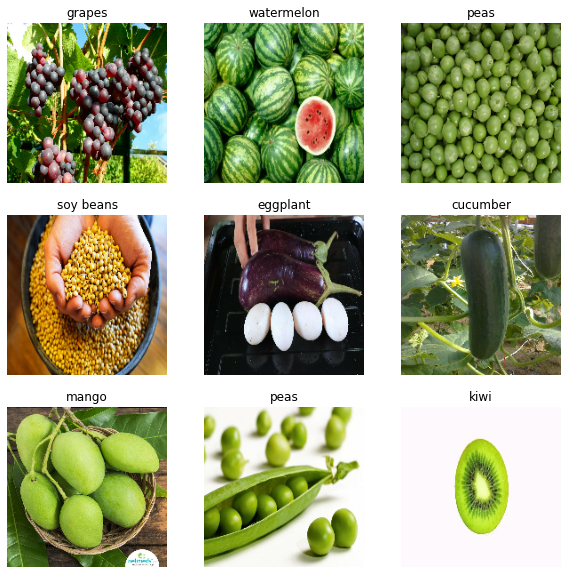

In [9]:
plt.figure(figsize = (10, 10))
for image, labels in data_train.take(1): 
    for i in range(9): 
        plt.subplot(3, 3, i+1) 
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential 

In [11]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/25
98/98 [==============================] - 74s 704ms/step - loss: 3.4596 - accuracy: 0.0684 - val_loss: 2.8991 - val_accuracy: 0.2279
Epoch 2/25
98/98 [==============================] - 73s 705ms/step - loss: 2.6409 - accuracy: 0.2565 - val_loss: 1.8574 - val_accuracy: 0.4672
Epoch 3/25
98/98 [==============================] - 73s 701ms/step - loss: 2.0590 - accuracy: 0.4090 - val_loss: 1.1456 - val_accuracy: 0.7094
Epoch 4/25
98/98 [==============================] - 73s 708ms/step - loss: 1.5234 - accuracy: 0.5727 - val_loss: 0.7982 - val_accuracy: 0.8063
Epoch 5/25
98/98 [==============================] - 73s 709ms/step - loss: 1.0266 - accuracy: 0.7047 - val_loss: 0.4422 - val_accuracy: 0.9031
Epoch 6/25
98/98 [==============================] - 73s 706ms/step - loss: 0.6300 - accuracy: 0.8193 - val_loss: 0.3819 - val_accuracy: 0.9174
Epoch 7/25
98/98 [==============================] - 73s 706ms/step - loss: 0.4268 - accuracy: 0.8819 - val_loss: 0.3526 - val_accuracy: 0.9316

Text(0.5, 1.0, 'Loss')

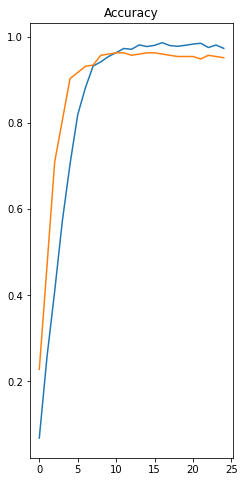

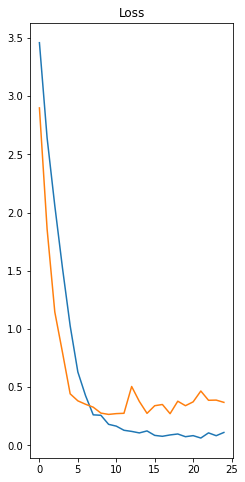

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')


In [41]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size = (img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [42]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 24ms/step


In [43]:
score = tf.nn.softmax(predict)

In [44]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))


Veg/Fruit in image is tomato with accuracy of 65.70


In [45]:
model.save('Image_classify.keras')